In [1]:
import time
import random
import numpy as np
from itertools import count
import matplotlib.pyplot as plt

In [2]:
grid_used = np.zeros((50,50), dtype=int)

In [3]:
def assign(grid):
    for i in range(50):
        for j in range(50):
            if random.randint(0,5)<2:
                grid[i][j] = 1

In [4]:
def check(grid):
    for i in range(50):
        for j in range(50):
            if grid[i][j]>0:
                return 0
    return 1

In [5]:
assign(grid_used)

In [6]:
blobs = []
del_blobs = []

In [7]:
class blob:
    def __init__(self, speed=1,i=random.randint(0,49),j=random.randint(0,49)):
        self.i = i
        self.j = j
        self.siz = 1
        self.speed = speed
        
        if grid_used[self.i][self.j] == 1:
                self.siz+=1

    def move(self):    
        for spd in range(1,self.speed+1):
            
            i_choices = random.choice([0,spd,-spd])
            j_choices = random.choice([0,spd,-spd])
            
            self.i = self.i+i_choices
            self.j = self.j+j_choices
            
            if self.i>49 or self.i<0:
                self.i = self.i - i_choices
            
            if self.j>49 or self.j<0:
                self.j = self.j - j_choices
            
            if grid_used[self.i][self.j] == 1:
                self.siz += 1
                grid_used[self.i][self.j] = 0
        
        if self.siz == 1:
            self.siz = 0
            
        if self.siz >= 2:
            self.siz = self.siz-1
            speed = self.speed+random.choice([-1,1,0])
            i = self.i
            j = self.j
            
            if speed > 4:
                speed = 2
            
            if speed > 0:
                blobs.append(blob(speed,i,j))

In [8]:
blobs = [blob() for clob in range(200)]

In [9]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


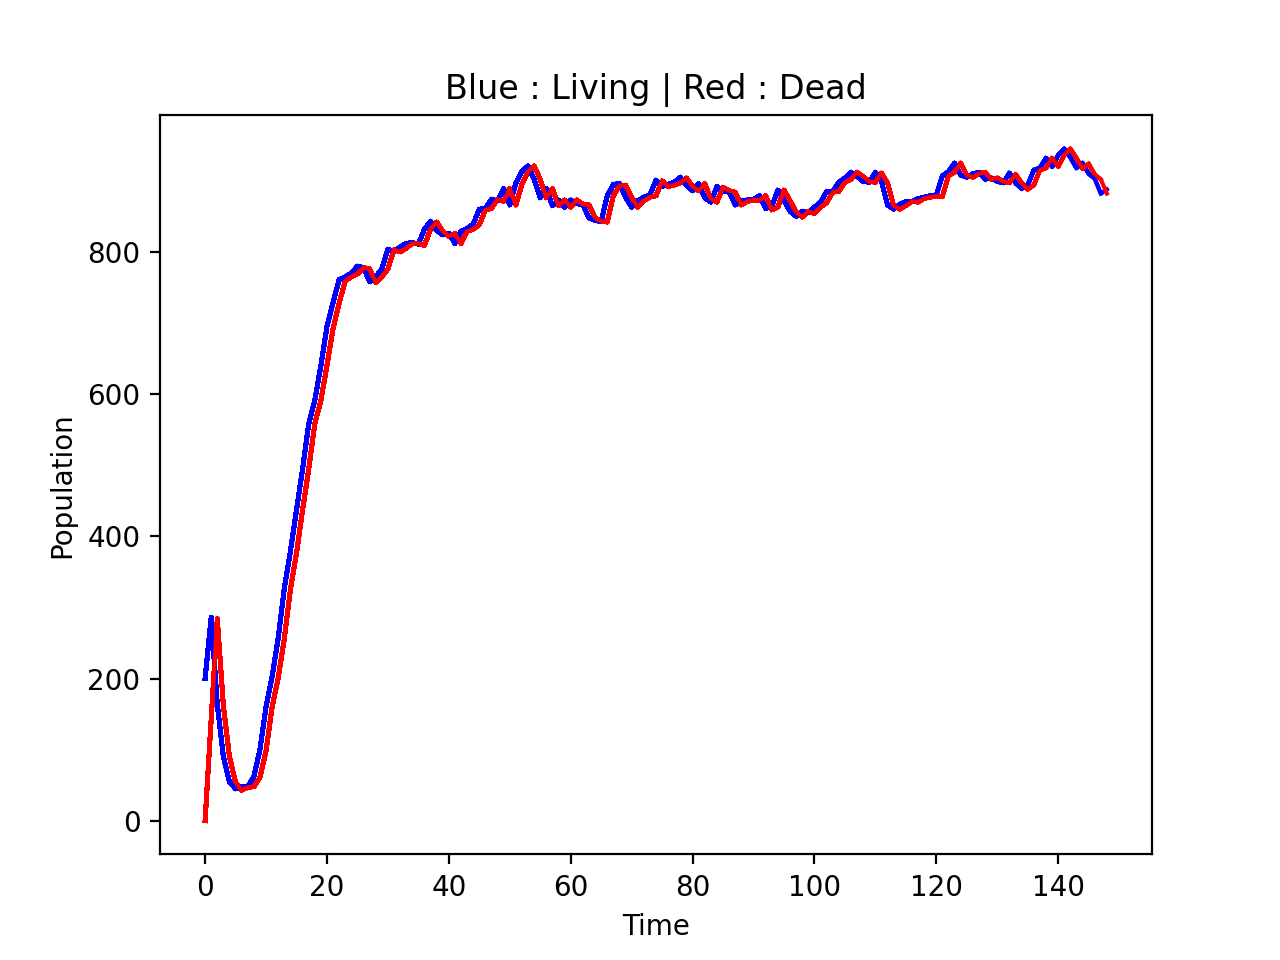

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Blue : Living | Red : Dead')
plt.xlabel("Time")
plt.ylabel("Population")
fig.show()

In [11]:
size_blob = []
index = count()
plot_x_axis = []
size_dead_blob = []

In [ ]:
while len(blobs)!=0:
    
    grid_used = np.zeros((50,50), dtype=int)
    assign(grid_used)
    
    size_blob.append(len(blobs))
    size_dead_blob.append(len(del_blobs))
    
    del_blobs = []
    
    plot_x_axis.append(next(index))
    fig.canvas.draw()
    ax.plot(plot_x_axis, size_blob, color='b')
    ax.plot(plot_x_axis, size_dead_blob, color='r')
    
    time.sleep(0.1)
    
    if check(grid_used)!=1:
        
        for objs in blobs:
            objs.move()
        
        for objs in blobs:    
            if objs.siz == 0:
                del_blobs.append(objs)
                
        for i, o in enumerate(blobs): # i return index and 0 returns object
            if o.siz == 0:
                del blobs[i]

In [13]:
len(blobs), len(del_blobs)

(888, 0)